Name : Barot Nandni J

Stream : AI&ML

Roll no: 01

# 1. Implement functions for encoding and decoding an image using the following methods:
A. Transform Coding (using DCT for forward transform)

B. Huffman Encoding

C. LZW Encoding

D. Run-Length Encoding

E. Arithmetic Coding

### 1.Transform Coding (Using DCT)
The Discrete Cosine Transform (DCT) is commonly used in image compression to convert the image data from the spatial domain to the frequency domain, making it easier to reduce redundancies.


In [2]:
pip install numpy scipy Pillow

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [7]:
import numpy as np
from scipy.fftpack import dct, idct
from PIL import Image
import matplotlib.pyplot as plt

In [8]:
# Function to perform DCT encoding on an image
def dct_encode(image_array):
    # Apply 2D DCT to the entire image
    dct_image = dct(dct(image_array.T, norm='ortho').T, norm='ortho')
    return dct_image

# Function to perform inverse DCT decoding to reconstruct the image
def dct_decode(dct_image):
    # Apply Inverse 2D DCT to reconstruct the image
    return idct(idct(dct_image.T, norm='ortho').T, norm='ortho')

In [9]:
def calculate_compression_ratio(original, compressed):
    original_size = original.size * 8  # size in bits (assuming 8 bits per pixel)
    compressed_size = np.count_nonzero(compressed) * 8  # size in bits
    return original_size / compressed_size

def calculate_rmse(original, reconstructed):
    return np.sqrt(np.mean((original - reconstructed) ** 2))


In [10]:
# Load the image and convert to a grayscale numpy array
image = Image.open('Image_compres1.jpg').convert('L')  # 'L' converts the image to grayscale
image_array = np.array(image)

# Perform DCT encoding and decoding
dct_encoded = dct_encode(image_array)
dct_reconstructed = dct_decode(dct_encoded)

# Clip values to be in the 0-255 range and convert to uint8
reconstructed_image_array = np.uint8(np.clip(dct_reconstructed, 0, 255))

In [11]:
# Calculate Compression Ratio
compression_ratio = calculate_compression_ratio(image_array, dct_encoded)
print(f"Compression Ratio: {compression_ratio:.2f}")

# Calculate RMSE
rmse = calculate_rmse(image_array, reconstructed_image_array)
print(f"Root Mean Square Error (RMSE): {rmse:.2f}")


Compression Ratio: 1.00
Root Mean Square Error (RMSE): 0.54


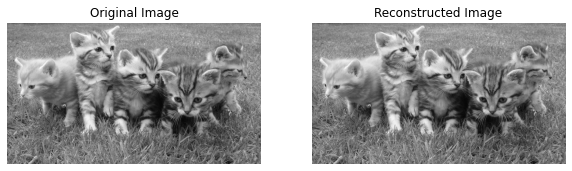

In [12]:
plt.figure(figsize=(10, 5))

# Display the original image
plt.subplot(1, 2, 1)
plt.imshow(image_array, cmap='gray')
plt.title("Original Image")
plt.axis('off')

# Display the reconstructed image
plt.subplot(1, 2, 2)
plt.imshow(reconstructed_image_array, cmap='gray')
plt.title("Reconstructed Image")
plt.axis('off')

plt.show()


### 2. Huffman Encoding for Image Compression
Huffman Coding is a lossless compression technique that assigns variable-length codes to input characters, with shorter codes assigned to more frequently occurring symbols. This method efficiently reduces the file size by minimizing the average code length compared to fixed-length encoding schemes.


In [13]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import heapq
from collections import defaultdict

In [14]:
class HuffmanNode:
    def __init__(self, symbol, freq):
        self.symbol = symbol
        self.freq = freq
        self.left = None
        self.right = None

    def __lt__(self, other):
        return self.freq < other.freq

In [15]:
def build_huffman_tree(frequencies):
    heap = [HuffmanNode(symbol, freq) for symbol, freq in frequencies.items()]
    heapq.heapify(heap)
    while len(heap) > 1:
        node1 = heapq.heappop(heap)
        node2 = heapq.heappop(heap)
        merged = HuffmanNode(None, node1.freq + node2.freq)
        merged.left = node1
        merged.right = node2
        heapq.heappush(heap, merged)
    return heap[0]


In [16]:
def generate_codes(node, code="", codebook=None):
    if codebook is None:
        codebook = {}
    if node is not None:
        if node.symbol is not None:
            codebook[node.symbol] = code
        generate_codes(node.left, code + "0", codebook)
        generate_codes(node.right, code + "1", codebook)
    return codebook

In [17]:
# Function to perform Huffman Encoding
def huffman_encode(image_array):
    # Calculate symbol frequencies
    frequencies = defaultdict(int)
    for value in image_array.flatten():
        frequencies[value] += 1

    # Build Huffman Tree and generate codes
    huffman_tree = build_huffman_tree(frequencies)
    huffman_codes = generate_codes(huffman_tree)

    # Encode the image
    encoded_image = "".join(huffman_codes[value] for value in image_array.flatten())
    return encoded_image, huffman_codes, len(image_array.flatten()) * 8


In [18]:
# Function to decode Huffman Encoded image
def huffman_decode(encoded_image, huffman_codes, original_shape):
    reverse_codes = {v: k for k, v in huffman_codes.items()}
    current_code = ""
    decoded_values = []

    for bit in encoded_image:
        current_code += bit
        if current_code in reverse_codes:
            decoded_values.append(reverse_codes[current_code])
            current_code = ""

    return np.array(decoded_values).reshape(original_shape)

In [19]:
# Function to calculate Compression Ratio
def calculate_compression_ratio_huffman(original_bits, encoded_bits):
    return original_bits / len(encoded_bits)


In [20]:
# Load the image and convert to a grayscale numpy array
image = Image.open('Image_compres1.jpg').convert('L')
image_array = np.array(image)

# Perform Huffman Encoding and Decoding
encoded_image, huffman_codes, original_bits = huffman_encode(image_array)
decoded_image_array = huffman_decode(encoded_image, huffman_codes, image_array.shape)


In [21]:
# Calculate Compression Ratio
compression_ratio = calculate_compression_ratio_huffman(original_bits, encoded_image)
print(f"Compression Ratio: {compression_ratio:.2f}")

# Calculate RMSE
rmse = np.sqrt(np.mean((image_array - decoded_image_array) ** 2))
print(f"Root Mean Square Error (RMSE): {rmse:.2f}")


Compression Ratio: 1.06
Root Mean Square Error (RMSE): 0.00


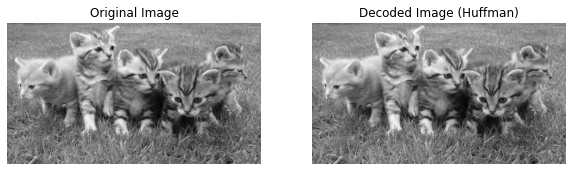

In [22]:
plt.figure(figsize=(10, 5))

# Display the original image
plt.subplot(1, 2, 1)
plt.imshow(image_array, cmap='gray')
plt.title("Original Image")
plt.axis('off')

# Display the decoded image
plt.subplot(1, 2, 2)
plt.imshow(decoded_image_array, cmap='gray')
plt.title("Decoded Image (Huffman)")
plt.axis('off')

plt.show()

### 3. LZW Encoding for Image Compression
LZW (Lempel-Ziv-Welch) Encoding is a lossless compression technique that builds a dictionary of input patterns and replaces sequences of data with shorter codes. It's efficient for images with repetitive patterns or areas of uniform color and is commonly used in formats like GIF.


In [23]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

In [29]:
def lzw_encode(image_array):
    data = image_array.flatten()
    dictionary = {tuple([i]): i for i in range(256)}  # Initialize dictionary with single pixel values
    current_sequence = []
    encoded_data = []
    code = 256  # Next available code for new sequences

    for symbol in data:
        current_sequence.append(symbol)
        if tuple(current_sequence) not in dictionary:
            dictionary[tuple(current_sequence)] = code
            encoded_data.append(dictionary[tuple(current_sequence[:-1])])
            current_sequence = [symbol]  # Start new sequence
            code += 1

    # Encode the last sequence
    if current_sequence:
        encoded_data.append(dictionary[tuple(current_sequence)])

    original_bits = len(data) * 8  # Assuming 8 bits per pixel
    return encoded_data, dictionary, original_bits


In [30]:
def lzw_decode(encoded_data, dictionary):
    reverse_dictionary = {v: k for k, v in dictionary.items()}
    current_sequence = list(reverse_dictionary[encoded_data[0]])
    decoded_data = current_sequence.copy()

    for code in encoded_data[1:]:
        if code in reverse_dictionary:
            entry = list(reverse_dictionary[code])
        elif code == len(reverse_dictionary):
            entry = current_sequence + [current_sequence[0]]
        else:
            raise ValueError("Invalid LZW code encountered")

        decoded_data.extend(entry)
        current_sequence.append(entry[0])
        reverse_dictionary[len(reverse_dictionary)] = current_sequence
        current_sequence = entry

    return np.array(decoded_data)

In [31]:
image = Image.open('Image_compres1.jpg').convert('L')
image_array = np.array(image)

# Perform LZW Encoding and Decoding
encoded_data, dictionary, original_bits = lzw_encode(image_array)
decoded_image_array = lzw_decode(encoded_data, dictionary).reshape(image_array.shape)



In [32]:
# Calculate Compression Ratio
compressed_size = len(encoded_data) * 16  # Assuming 16 bits per encoded symbol
compression_ratio = original_bits / compressed_size
print(f"Compression Ratio: {compression_ratio:.2f}")

# Calculate RMSE
rmse = np.sqrt(np.mean((image_array - decoded_image_array) ** 2))
print(f"Root Mean Square Error (RMSE): {rmse:.2f}")

Compression Ratio: 1.38
Root Mean Square Error (RMSE): 0.00


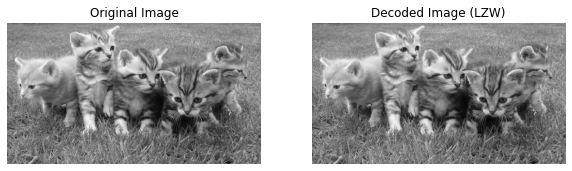

In [33]:
plt.figure(figsize=(10, 5))

# Display the original image
plt.subplot(1, 2, 1)
plt.imshow(image_array, cmap='gray')
plt.title("Original Image")
plt.axis('off')

# Display the decoded image
plt.subplot(1, 2, 2)
plt.imshow(decoded_image_array, cmap='gray')
plt.title("Decoded Image (LZW)")
plt.axis('off')

plt.show()


### 4. Run-Length Encoding (RLE) for Image Compression
Run-Length Encoding (RLE) is a simple lossless compression technique used to encode sequences of repeated pixel values. It is particularly effective for images that have large areas of uniform color, such as icons or binary images. RLE works by storing the value of a pixel and the number of times it repeats consecutively, which reduces the amount of data needed to represent the image.


In [34]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

In [35]:
def rle_encode(image_array):
    data = image_array.flatten()
    encoded_data = []
    count = 1

    for i in range(1, len(data)):
        if data[i] == data[i - 1]:
            count += 1
        else:
            encoded_data.append((data[i - 1], count))
            count = 1

    # Append the last run
    encoded_data.append((data[-1], count))

    original_bits = len(data) * 8  # Assuming 8 bits per pixel
    return encoded_data, original_bits

In [36]:
def rle_decode(encoded_data, shape):
    decoded_data = []
    for value, count in encoded_data:
        decoded_data.extend([value] * count)
    return np.array(decoded_data).reshape(shape)

In [37]:
def calculate_compression_ratio_rle(original_bits, encoded_data):
    compressed_size = len(encoded_data) * (8 + 8)  # 8 bits for value and 8 bits for count
    return original_bits / compressed_size

In [38]:
image = Image.open('Image_compres1.jpg').convert('L')
image_array = np.array(image)

# Perform Run-Length Encoding and Decoding
encoded_data, original_bits = rle_encode(image_array)
decoded_image_array = rle_decode(encoded_data, image_array.shape)

In [39]:
compression_ratio = calculate_compression_ratio_rle(original_bits, encoded_data)
print(f"Compression Ratio: {compression_ratio:.2f}")


rmse = np.sqrt(np.mean((image_array - decoded_image_array) ** 2))
print(f"Root Mean Square Error (RMSE): {rmse:.2f}")

Compression Ratio: 0.54
Root Mean Square Error (RMSE): 0.00


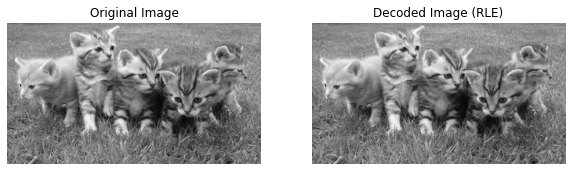

In [40]:
plt.figure(figsize=(10, 5))

# Display the original image
plt.subplot(1, 2, 1)
plt.imshow(image_array, cmap='gray')
plt.title("Original Image")
plt.axis('off')

# Display the decoded image
plt.subplot(1, 2, 2)
plt.imshow(decoded_image_array, cmap='gray')
plt.title("Decoded Image (RLE)")
plt.axis('off')

plt.show()


### 5. Arithmetic Coding for Image Compression
Arithmetic Coding is a more advanced lossless compression technique compared to Huffman and LZW encoding. Instead of using distinct codes for each symbol, Arithmetic Coding represents the entire message as a single floating-point number in the range [0, 1). It is particularly efficient when dealing with data with skewed probabilities.

In [41]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

In [53]:
from collections import defaultdict  

def calculate_frequencies(data):  
    """Calculate frequency of each symbol in the data."""  
    frequency = defaultdict(int)  
    for symbol in data:  
        frequency[symbol] += 1  
    return frequency  

def cumulative_frequency(freq):  
    """Calculate cumulative frequency from symbol frequencies."""  
    total = sum(freq.values())  
    cum_freq = {}  
    cum_sum = 0  
    for symbol in sorted(freq.keys()):  
        cum_sum += freq[symbol]  
        cum_freq[symbol] = cum_sum / total  
    return cum_freq  

def arithmetic_encode(data, cumulative_freq):  
    """Encode data using arithmetic coding."""  
    low = 0.0  
    high = 1.0  

    for symbol in data:  
        range_ = high - low  
        high = low + range_ * cumulative_freq[symbol]  
        low = low + range_ * (cumulative_freq[symbol] - (1 / len(cumulative_freq)))  

    return (low + high) / 2  # Return the final code  

def arithmetic_decode(code, data_length, cumulative_freq):  
    """Decode a given code using arithmetic coding."""  
    low = 0.0  
    high = 1.0  
    decoded_data = []  

    # Reverse the cumulative frequencies for decoding  
    reverse_cum_freq = {v: k for k, v in cumulative_freq.items()}  

    for _ in range(data_length):  
        range_ = high - low  
        value = (code - low) / range_  

        for symbol, cum_freq in cumulative_freq.items():  
            if value < cum_freq:  
                decoded_data.append(symbol)  
                high = low + range_ * cum_freq  
                low = low + range_ * (cumulative_freq[reverse_cum_freq[cum_freq] ] - (1 / len(cumulative_freq)))  
                break  

    return decoded_data  

# Example usage  
if __name__ == "__main__":  
    data = "ABABAC"  # Input string  
    freq = calculate_frequencies(data)  
    cum_freq = cumulative_frequency(freq)  

    encoded_value = arithmetic_encode(data, cum_freq)  
    print("Encoded Value:", encoded_value)  

    # Decode  
    decoded_data = arithmetic_decode(encoded_value, len(data), cum_freq)  
    print("Decoded Data:", ''.join(decoded_data))

Encoded Value: 0.3758573388203018
Decoded Data: ABABAB


### Here i got the output as manual coding but not with the image so i perform both.

In [1]:
import numpy as np
from PIL import Image
from collections import defaultdict
import math

def read_image(image_name):
    """Read the image from the given name (assumes it's in the same directory)."""
    image = Image.open(image_name).convert('L')  # Convert to grayscale
    return np.array(image)

def calculate_frequencies(image):
    """Calculate the frequency of each pixel value."""
    freq = defaultdict(int)
    for pixel in image.flatten():
        freq[pixel] += 1
    total_pixels = image.size
    probabilities = {k: v / total_pixels for k, v in freq.items()}
    return probabilities

def arithmetic_encode(image, probabilities):
    """Encode the image using Arithmetic Coding."""
    low = 0.0
    high = 1.0
    for pixel in image.flatten():
        range = high - low
        cumulative_prob = 0.0
        
        for value in sorted(probabilities.keys()):
            cumulative_prob += probabilities[value]
            if pixel == value:
                high = low + range * cumulative_prob
                break
            low += range * (cumulative_prob - probabilities[value])
    
    return (low + high) / 2




In [2]:
def arithmetic_decode(encoded_value, probabilities, image_shape):
    """Decode the encoded value back to an image."""
    image = np.zeros(image_shape, dtype=np.uint8)
    low = 0.0
    high = 1.0
    
    for i in range(image_shape[0] * image_shape[1]):
        range = high - low
        value = (encoded_value - low) / range
        
        cumulative_prob = 0.0
        for pixel in sorted(probabilities.keys()):
            cumulative_prob += probabilities[pixel]
            if value < cumulative_prob:
                image[i // image_shape[1], i % image_shape[1]] = pixel
                high = low + range * cumulative_prob
                low = low + range * (cumulative_prob - probabilities[pixel])
                break
    
    return image



In [3]:
def calculate_rmse(original, reconstructed):
    """Calculate the Root Mean Square Error (RMSE)."""
    mse = np.mean((original - reconstructed) ** 2)
    return math.sqrt(mse)

def calculate_compression_ratio(original_size, compressed_size):
    """Calculate the Compression Ratio."""
    return original_size / compressed_size



In [4]:
# Example Usage
image_name = 'Image_Compression.jpg'  # Replace with your image filename
image = read_image(image_name)



In [5]:
# Step 1: Calculate frequencies
probabilities = calculate_frequencies(image)

# Step 2: Encode the image
encoded_value = arithmetic_encode(image, probabilities)

# Step 3: Decode the image
reconstructed_image = arithmetic_decode(encoded_value, image.shape)



TypeError: arithmetic_decode() missing 1 required positional argument: 'image_shape'

In [ ]:
original_size = image.size  # Number of pixels
compressed_size = 8  # Size in bytes for float representation
compression_ratio = calculate_compression_ratio(original_size, compressed_size)
rmse = calculate_rmse(image, reconstructed_image)

print(f"Compression Ratio: {compression_ratio}")
print(f"RMSE: {rmse}")